In [1]:
# !pip install openvino-dev
# !pip install distinctipy

In [2]:
from icevision.all import *

INFO     - The mmdet config folder already exists. No need to downloaded it. Path : /home/innom-dt/.icevision/mmdetection_configs/mmdetection_configs-2.16.0/configs | icevision.models.mmdet.download_configs:download_mmdet_configs:17


In [3]:
import pandas as pd
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
import inspect

def inspect_default_args(target, annotations: bool=False):
    # Get the argument names
    args = inspect.getfullargspec(target).args
    # Get the default values
    defaults = inspect.getfullargspec(target).defaults

    index = ["Default Value"]

    # Pad defaults
    defaults = [None]*(len(args)-len(defaults)) + list(defaults)
    if annotations:
        index.append("Annotation")
        annotations = inspect.getfullargspec(target).annotations.values()
        # Pad annotations
        annotations = [None]*(len(args)-len(annotations)) + list(annotations)
        default_args = {arg:[df, annot] for arg,df,annot in zip(args, defaults, annotations)}
    else:
        default_args = {arg:[default] for arg,default in zip(args, defaults)}
        
    return pd.DataFrame(default_args, index=index).T


### Kaggle API
* [GitHub Repository](https://github.com/Kaggle/kaggle-api)
* [Documentation](https://github.com/Kaggle/kaggle-api#competitions)
* Install: `pip install kaggle`
* Need to get an API Key for your Kaggle account
    * [https://www.kaggle.com/me/account](https://www.kaggle.com/me/account)

**Enter Kaggle username and API token**

In [ ]:
creds = '{"username":"","key":""}'

**Save Kaggle credentials if none are present**
* **Source:** [https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb](https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb)

In [ ]:
cred_path = Path('~/.kaggle/kaggle.json').expanduser()
# Save API key to a json file if it does not already exist
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

**Import Kaggle API**

In [ ]:
from kaggle import api

**Define path to dataset**

In [ ]:
kaggle_dataset = 'innominate817/hagrid-sample-120k-384p'
archive_dir = URLs.path()
dataset_dir = archive_dir/'../data'
dataset_name = 'asl-and-some-words'
archive_path = Path(f'{archive_dir}/{dataset_name}.zip')
dataset_path = Path(f'{dataset_dir}/{dataset_name}')

**Download the dataset**

In [5]:
# icedata.load_data(dataset_url, dataset_path)

In [6]:
# dataset_path = icedata.voc.load_data()
# dataset_path

**Define path to dataset**

In [7]:
dataset_dir = Path('/mnt/980SSD_1TB_2/Datasets/hagrid/')
dataset_path = dataset_dir/'hagrid_30k'
# dataset_path = dataset_dir/'hagrid_60k'
# dataset_path = dataset_dir/'hagrid_120k'
# dataset_path = dataset_dir/'hagrid_250k'
# dataset_path = dataset_dir/'hagrid_500k'
dataset_path

Path('/mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k')

In [8]:
ann_dir = dataset_dir/'annotations/ann_train_val/ann_train_val/'
ann_dir

Path('/mnt/980SSD_1TB_2/Datasets/hagrid/annotations/ann_train_val/ann_train_val')

**Inspect the dataset path**

In [9]:
pd.DataFrame(list(dataset_path.ls()))

0
0              /mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_call
1           /mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_dislike
2              /mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_fist
3              /mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_four
4              /mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_like
5              /mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_mute
6                /mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_ok
7               /mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_one
8              /mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_palm
9             /mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_peace
10   /mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_peace_inverted
11             /mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_rock
12             /mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_stop
13    /mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_stop_inverted
14            /mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_three
15           /mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_three2
16           /mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_two_up
17  /mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_two_up_inverted

**Get image file paths**

In [10]:
files = get_image_files(dataset_path)
len(files)

31833

**Inspect files**

In [11]:
pd.DataFrame([files[0], files[-1]])

0
0             /mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_call/00005c9c-3548-4a8f-9d0b-2dd4aff37fc9.jpg
1  /mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_two_up_inverted/fff4d2f6-9890-4225-8d9c-73a02ba8f9ac.jpg

**Inspect one of the training images**

Image Dims: (512, 384)


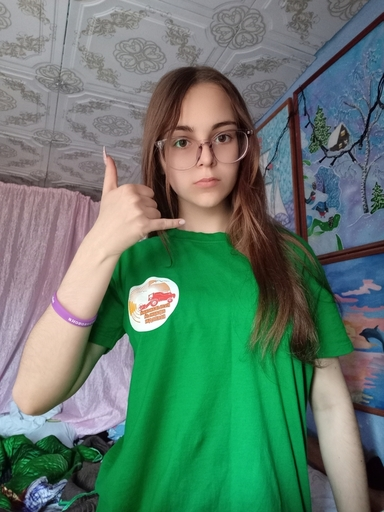

In [12]:
import PIL
img = PIL.Image.open(files[0]).convert('RGB')
print(f"Image Dims: {img.shape}")
img

In [13]:
import os
from glob import glob

**Create a dictionary that maps image names to file paths**

In [14]:
img_dict = {file.name.split('.')[0] : file for file in files}
list(img_dict.items())[0]

('00005c9c-3548-4a8f-9d0b-2dd4aff37fc9',
 Path('/mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_call/00005c9c-3548-4a8f-9d0b-2dd4aff37fc9.jpg'))

**Create annotations dataframe**

In [15]:
all_files = glob(os.path.join(ann_dir, "*.json"))
all_files

['/mnt/980SSD_1TB_2/Datasets/hagrid/annotations/ann_train_val/ann_train_val/call.json',
 '/mnt/980SSD_1TB_2/Datasets/hagrid/annotations/ann_train_val/ann_train_val/dislike.json',
 '/mnt/980SSD_1TB_2/Datasets/hagrid/annotations/ann_train_val/ann_train_val/fist.json',
 '/mnt/980SSD_1TB_2/Datasets/hagrid/annotations/ann_train_val/ann_train_val/four.json',
 '/mnt/980SSD_1TB_2/Datasets/hagrid/annotations/ann_train_val/ann_train_val/like.json',
 '/mnt/980SSD_1TB_2/Datasets/hagrid/annotations/ann_train_val/ann_train_val/mute.json',
 '/mnt/980SSD_1TB_2/Datasets/hagrid/annotations/ann_train_val/ann_train_val/ok.json',
 '/mnt/980SSD_1TB_2/Datasets/hagrid/annotations/ann_train_val/ann_train_val/one.json',
 '/mnt/980SSD_1TB_2/Datasets/hagrid/annotations/ann_train_val/ann_train_val/palm.json',
 '/mnt/980SSD_1TB_2/Datasets/hagrid/annotations/ann_train_val/ann_train_val/peace.json',
 '/mnt/980SSD_1TB_2/Datasets/hagrid/annotations/ann_train_val/ann_train_val/peace_inverted.json',
 '/mnt/980SSD_1TB_2/D

In [16]:
annotation_paths = glob(os.path.join(ann_dir, "*.json"))
cls_dataframes = (pd.read_json(f).transpose() for f in all_files)
annotation_df = pd.concat(cls_dataframes, ignore_index=False)
annotation_df = annotation_df.loc[list(img_dict.keys())]
annotation_df.head()

bboxes  \
00005c9c-3548-4a8f-9d0b-2dd4aff37fc9                                                                    [[0.23925175, 0.28595301, 0.25055143, 0.20777627]]   
0020a3db-82d8-47aa-8642-2715d4744db5                                                            [[0.5801012999999999, 0.53265105, 0.14562138, 0.12286348]]   
004ac93f-0f7c-49a4-aadc-737e0ad4273c                                                           [[0.46294793, 0.26419774, 0.13834939000000002, 0.10784189]]   
006cac69-d3f0-47f9-aac9-38702d038ef1                                                                    [[0.38799208, 0.44643898, 0.27068787, 0.18277858]]   
00973fac-440e-4a56-b60c-2a06d5fb155d  [[0.40980118, 0.38144198, 0.08338464, 0.06229785], [0.6122035100000001, 0.6780825500000001, 0.04700606, 0.07640522]]   

                                                  labels leading_hand  \
00005c9c-3548-4a8f-9d0b-2dd4aff37fc9              [call]        right   
0020a3db-82d8-47aa-8642-2715d4744db5              [call]         left   
004ac93f-0f7c-49a4-aadc-737e0ad4273c              [call]        right   
006cac69-d3f0-47f9-aac9-38702d038ef1              [call]        right   
00973fac-440e-4a56-b60c-2a06d5fb155d  [call, no_gesture]        right   

                                     leading_conf  \
00005c9c-3548-4a8f-9d0b-2dd4aff37fc9            1   
0020a3db-82d8-47aa-8642-2715d4744db5            1   
004ac93f-0f7c-49a4-aadc-737e0ad4273c            1   
006cac69-d3f0-47f9-aac9-38702d038ef1            1   
00973fac-440e-4a56-b60c-2a06d5fb155d            1   

                                                                                               user_id  
00005c9c-3548-4a8f-9d0b-2dd4aff37fc9  5a389ffe1bed6660a59f4586c7d8fe2770785e5bf79b09334aa951f6f119c024  
0020a3db-82d8-47aa-8642-2715d4744db5  0d6da2c87ef8eabeda2dcfee2dc5b5035e878137a91b149c754a59804f3dce32  
004ac93f-0f7c-49a4-aadc-737e0ad4273c  d50f05d9d6ca9771938cec766c3d621ff863612f9665b0e4d991c086ec04acc9  
006cac69-d3f0-47f9-aac9-38702d038ef1  998f6ad69140b3a59cb9823ba680cce62bf2ba678058c2fc497dbbb8b22b29fe  
00973fac-440e-4a56-b60c-2a06d5fb155d  4bb3ee1748be58e05bd1193939735e57bb3c0ca59a7ee38901744d6b9e94632e

In [17]:
file_id = files[0].name.split('.')[0]
file_id

'00005c9c-3548-4a8f-9d0b-2dd4aff37fc9'

In [18]:
annotation_df.loc[file_id].to_frame()

00005c9c-3548-4a8f-9d0b-2dd4aff37fc9
bboxes                      [[0.23925175, 0.28595301, 0.25055143, 0.20777627]]
labels                                                                  [call]
leading_hand                                                             right
leading_conf                                                                 1
user_id       5a389ffe1bed6660a59f4586c7d8fe2770785e5bf79b09334aa951f6f119c024

In [19]:
bbox_dims = annotation_df.loc[file_id]['bboxes'][0]
bbox_dims

[0.23925175, 0.28595301, 0.25055143, 0.20777627]

In [20]:
width, height = img.size
width, height

(384, 512)

In [21]:
x = bbox_dims[0]*width
y = bbox_dims[1]*height
w = bbox_dims[2]*width
h = bbox_dims[3]*height
x, y, w, h

(91.87267200000001, 146.40794112, 96.21174912000001, 106.38145024)

In [22]:
bbox = BBox.from_xywh(x, y, w, h)
bbox

<BBox (xmin:91.87267200000001, ymin:146.40794112, xmax:188.08442112, ymax:252.78939136000002)>

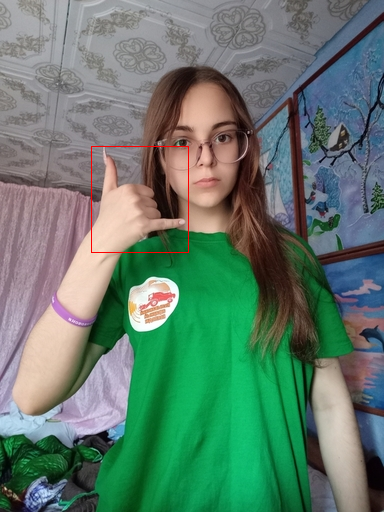

In [23]:
from PIL import ImageDraw
img = PIL.Image.open(files[0])
img_ann = ImageDraw.Draw(img)
shape = (bbox.xmin, bbox.ymin, bbox.xmax, bbox.ymax)
img_ann.rectangle(shape, outline='red')
img

In [24]:
labels = annotation_df['labels'].explode().unique().tolist()
labels

['call',
 'no_gesture',
 'dislike',
 'fist',
 'four',
 'like',
 'mute',
 'ok',
 'one',
 'palm',
 'peace',
 'peace_inverted',
 'rock',
 'stop',
 'stop_inverted',
 'three',
 'three2',
 'two_up',
 'two_up_inverted']

**Select a test image**

In [25]:
annotation_df.iloc[4].to_frame()

00973fac-440e-4a56-b60c-2a06d5fb155d
bboxes        [[0.40980118, 0.38144198, 0.08338464, 0.06229785], [0.6122035100000001, 0.6780825500000001, 0.04700606, 0.07640522]]
labels                                                                                                          [call, no_gesture]
leading_hand                                                                                                                 right
leading_conf                                                                                                                     1
user_id                                                           4bb3ee1748be58e05bd1193939735e57bb3c0ca59a7ee38901744d6b9e94632e

In [26]:
test_file = img_dict[annotation_df.iloc[4].name]
test_file

Path('/mnt/980SSD_1TB_2/Datasets/hagrid/hagrid_30k/train_val_call/00973fac-440e-4a56-b60c-2a06d5fb155d.jpg')

In [140]:
test_file = 'demo.jpg'

(1535, 864)


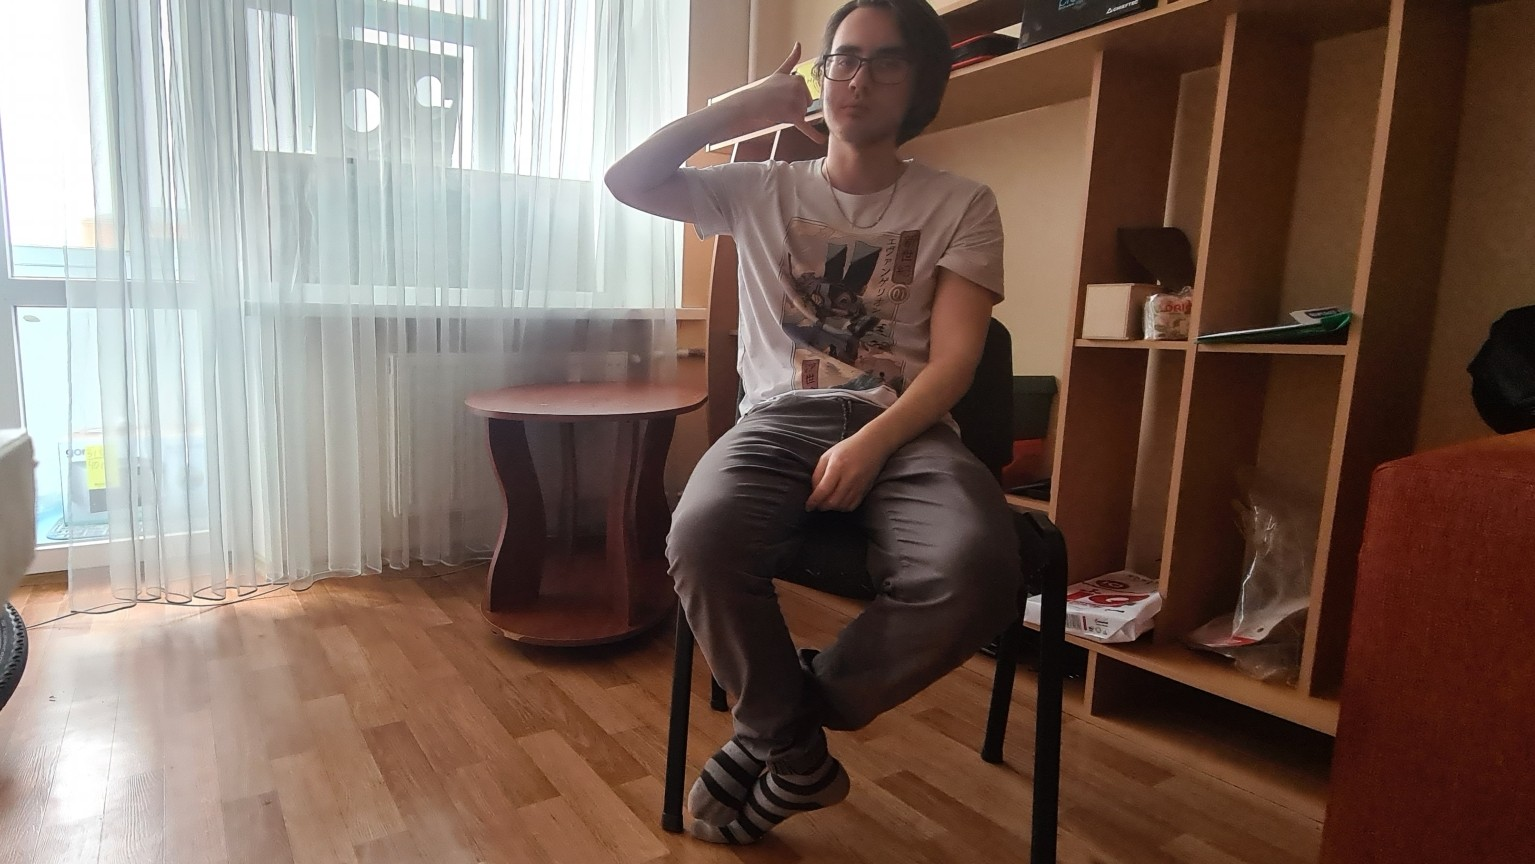

In [141]:
test_img = PIL.Image.open(test_file).convert('RGB')
print(test_img.size)
test_img

In [142]:
stride_val = 32

In [143]:
input_w = test_img.width - (test_img.width % stride_val)
input_h = test_img.height - (test_img.height % stride_val)
input_w, input_h

(1504, 864)

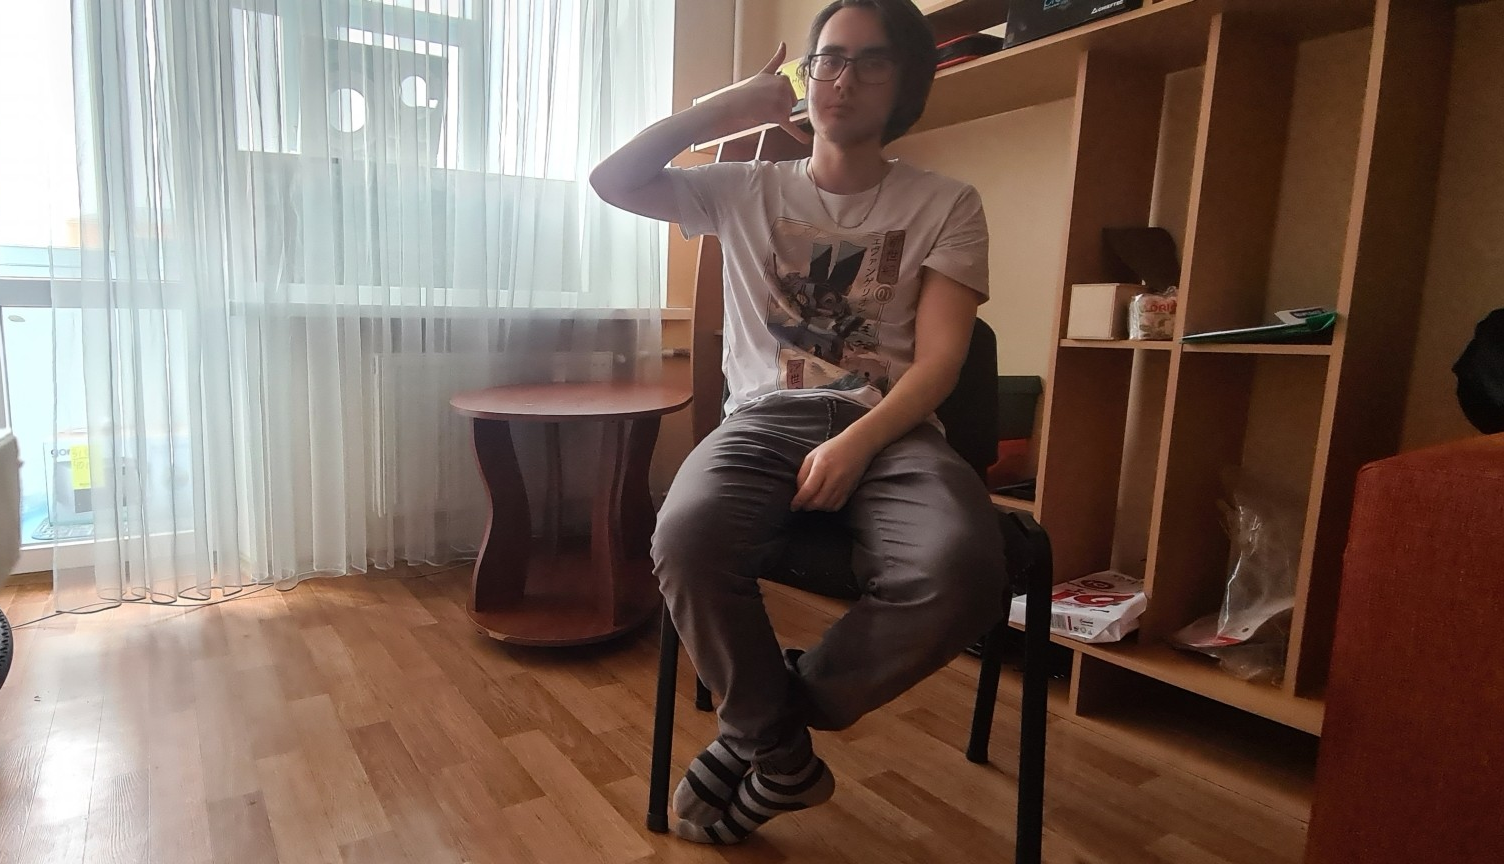

In [144]:
test_img = test_img.crop_pad((input_w, input_h))
test_img

In [145]:
from IPython.display import Markdown, display

In [146]:
from openvino.runtime import Core

In [147]:
output_dir = Path('./')
output_dir

Path('.')

In [148]:
ir_path = Path(f"hagrid_30k-YOLOX.xml")
ir_path

Path('hagrid_30k-YOLOX.xml')

In [149]:
# Convert image to tensor
img_tensor = torch.Tensor(np.array(test_img)).permute(2, 0, 1)
# Scale pixels values from [0,255] to [0,1]
scaled_tensor = img_tensor.float().div_(255)

In [150]:
input_image = scaled_tensor.unsqueeze(dim=0)
input_image.shape

torch.Size([1, 3, 864, 1504])

In [151]:
ir_path

Path('hagrid_30k-YOLOX.xml')

In [152]:
# Load the network in Inference Engine
ie = Core()
model_ir = ie.read_model(model=ir_path)
model_ir.reshape(input_image.shape)
compiled_model_ir = ie.compile_model(model=model_ir, device_name="CPU")

# Get input and output layers
input_layer_ir = next(iter(compiled_model_ir.inputs))
output_layer_ir = next(iter(compiled_model_ir.outputs))

# Run inference on the input image
res_ir = compiled_model_ir([input_image])[output_layer_ir]

In [153]:
res_ir.shape

(1, 26649, 24)

In [154]:
def generate_grid_strides(height, width, strides=[8, 16, 32]):
    
    grid_strides = []

    # Iterate through each stride value
    for stride in strides:
        # Calculate the grid dimensions
        grid_height = height // stride
        grid_width = width // stride

        # Store each combination of grid coordinates
        for g1 in range(grid_height):
            
            for g0 in range(grid_width):
                grid_strides.append({'grid0':g0, 'grid1':g1, 'stride':stride })
    
    return grid_strides

In [155]:
strides = [8, 16, 32]

In [156]:
grid_strides = generate_grid_strides(test_img.height, test_img.width, strides)
len(grid_strides)

26649

In [157]:
pd.DataFrame(grid_strides).head()

grid0  grid1  stride
0      0      0       8
1      1      0       8
2      2      0       8
3      3      0       8
4      4      0       8

In [158]:
def generate_yolox_proposals(feat_ptr, proposal_length, grid_strides, bbox_conf_thresh=0.3):
    
    proposals = []
    
    # Obtain the number of classes the model was trained to detect
    num_classes = proposal_length - 5

    for anchor_idx in range(len(grid_strides)):
        
        # Get the current grid and stride values
        grid0 = grid_strides[anchor_idx]['grid0']
        grid1 = grid_strides[anchor_idx]['grid1']
        stride = grid_strides[anchor_idx]['stride']

        # Get the starting index for the current proposal
        start_idx = anchor_idx * proposal_length

        # Get the coordinates for the center of the predicted bounding box
        x_center = (feat_ptr[start_idx + 0] + grid0) * stride
        y_center = (feat_ptr[start_idx + 1] + grid1) * stride

        # Get the dimensions for the predicted bounding box
        w = np.exp(feat_ptr[start_idx + 2]) * stride
        h = np.exp(feat_ptr[start_idx + 3]) * stride

        # Calculate the coordinates for the upper left corner of the bounding box
        x0 = x_center - w * 0.5
        y0 = y_center - h * 0.5

        # Get the confidence score that an object is present
        box_objectness = feat_ptr[start_idx + 4]

        # Initialize object struct with bounding box information
        obj = { 'x0':x0, 'y0':y0, 'width':w, 'height':h, 'label':0, 'prob':0 }

        # Find the object class with the highest confidence score
        for class_idx in range(num_classes):
            
            # Get the confidence score for the current object class
            box_cls_score = feat_ptr[start_idx + 5 + class_idx]
            # Calculate the final confidence score for the object proposal
            box_prob = box_objectness * box_cls_score
            
            # Check for the highest confidence score
            if (box_prob > obj['prob']):
                obj['label'] = class_idx
                obj['prob'] = box_prob

        # Only add object proposals with high enough confidence scores
        if obj['prob'] > bbox_conf_thresh: proposals.append(obj)
    
    proposals.sort(key=lambda x:x['prob'], reverse=True)
    return proposals

In [174]:
bbox_conf_thresh = 0.5

In [175]:
proposals = generate_yolox_proposals(res_ir.flatten(), res_ir.shape[2], grid_strides, bbox_conf_thresh)
proposals_df = pd.DataFrame(proposals)
proposals_df['label'] = proposals_df['label'].apply(lambda x: labels[x])
proposals_df

x0          y0      width      height       label      prob
0   791.999978  432.744055  81.342743   81.101433  no_gesture  0.863150
1   731.537269   38.800893  82.136101  104.816879        call  0.856144
2   792.639991  434.759274  81.299782   79.800575  no_gesture  0.849552
3   789.758037  432.106900  83.068558   82.188072  no_gesture  0.848748
4   731.120827   39.134628  82.003143  106.449585        call  0.846035
5   730.024117   37.887589  83.789612  104.278343        call  0.842571
6   730.247056   38.626645  83.155731  105.485062        call  0.838368
7   790.628411  433.989494  82.847275   80.678116  no_gesture  0.835856
8   727.617899   36.984996  86.633713  107.265190        call  0.822521
9   728.038838   36.410578  84.803734  109.558441        call  0.820651
10  789.345978  432.935451  84.457207   81.494576  no_gesture  0.786226
11  790.323827  432.439598  84.998840   83.190475  no_gesture  0.773667
12  732.515490   39.583984  80.667953  104.967018        call  0.772856
13  729.139655   37.716417  83.454483  109.723816        call  0.736723
14  788.803487  431.918255  83.013283   83.409859  no_gesture  0.625204
15  788.086822  432.147210  84.975723   82.023460  no_gesture  0.600028

In [176]:
def calc_union_area(a, b):
    x = min(a['x0'], b['x0'])
    y = min(a['y0'], b['y0'])
    w = max(a['x0']+a['width'], b['x0']+b['width']) - x
    h = max(a['y0']+a['height'], b['y0']+b['height']) - y
    return w*h

In [177]:
def calc_inter_area(a, b):
    x = max(a['x0'], b['x0'])
    y = max(a['y0'], b['y0'])
    w = min(a['x0']+a['width'], b['x0']+b['width']) - x
    h = min(a['y0']+a['height'], b['y0']+b['height']) - y
    return w*h

In [178]:
def nms_sorted_boxes(nms_thresh=0.45):
    
    proposal_indices = []
    
    # Iterate through the object proposals
    for i in range(len(proposals)):
        
        a = proposals[i]
        keep = True

        # Check if the current object proposal overlaps any selected objects too much
        for j in proposal_indices:
            
            b = proposals[j]

            # Calculate the area where the two object bounding boxes overlap
            inter_area = calc_inter_area(a, b)

            # Calculate the union area of both bounding boxes
            union_area = calc_union_area(a, b)
            
            # Ignore object proposals that overlap selected objects too much
            if inter_area / union_area > nms_thresh: keep = False

        # Keep object proposals that do not overlap selected objects too much
        if keep: proposal_indices.append(i)
    
    return proposal_indices

In [179]:
nms_thresh = 0.45

In [180]:
proposal_indices = nms_sorted_boxes(nms_thresh)
proposal_indices

[0, 1]

In [181]:
proposals_df.iloc[proposal_indices]

x0          y0      width      height       label      prob
0  791.999978  432.744055  81.342743   81.101433  no_gesture  0.863150
1  731.537269   38.800893  82.136101  104.816879        call  0.856144

**Import library for generating color palette**

In [182]:
from distinctipy import distinctipy

**Generate a visually distinct color for each label**

In [183]:
colors = distinctipy.get_colors(len(labels))

**Display the generated color palette**

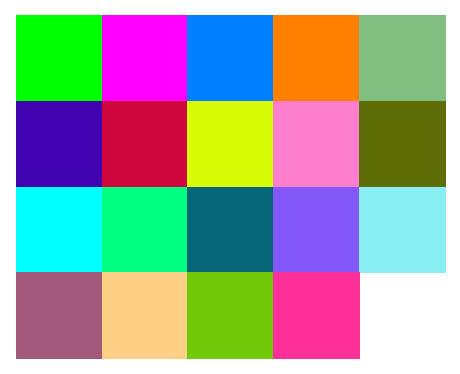

In [184]:
distinctipy.color_swatch(colors)

**Set precision for color values**

In [185]:
precision = 5

**Round color values to specified precision**

In [186]:
colors = [[np.round(ch, precision) for ch in color] for color in colors]
colors

[[0.0, 1.0, 0.0],
 [1.0, 0.0, 1.0],
 [0.0, 0.5, 1.0],
 [1.0, 0.5, 0.0],
 [0.5, 0.75, 0.5],
 [0.25634, 0.01128, 0.68473],
 [0.81104, 0.02054, 0.23726],
 [0.84786, 0.98976, 0.02409],
 [0.99238, 0.49235, 0.80377],
 [0.37179, 0.42918, 0.02846],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 0.5],
 [0.01798, 0.40194, 0.46811],
 [0.51811, 0.34054, 0.97248],
 [0.53832, 0.93456, 0.95762],
 [0.6376, 0.34936, 0.47869],
 [0.99304, 0.81664, 0.52289],
 [0.44684, 0.78667, 0.03801],
 [0.99257, 0.18688, 0.59864]]

In [187]:
colors_255 = [tuple([int(ch*255) for ch in color]) for color in colors]
colors_255

[(0, 255, 0),
 (255, 0, 255),
 (0, 127, 255),
 (255, 127, 0),
 (127, 191, 127),
 (65, 2, 174),
 (206, 5, 60),
 (216, 252, 6),
 (253, 125, 204),
 (94, 109, 7),
 (0, 255, 255),
 (0, 255, 127),
 (4, 102, 119),
 (132, 86, 247),
 (137, 238, 244),
 (162, 89, 122),
 (253, 208, 133),
 (113, 200, 9),
 (253, 47, 152)]

(1504, 864)


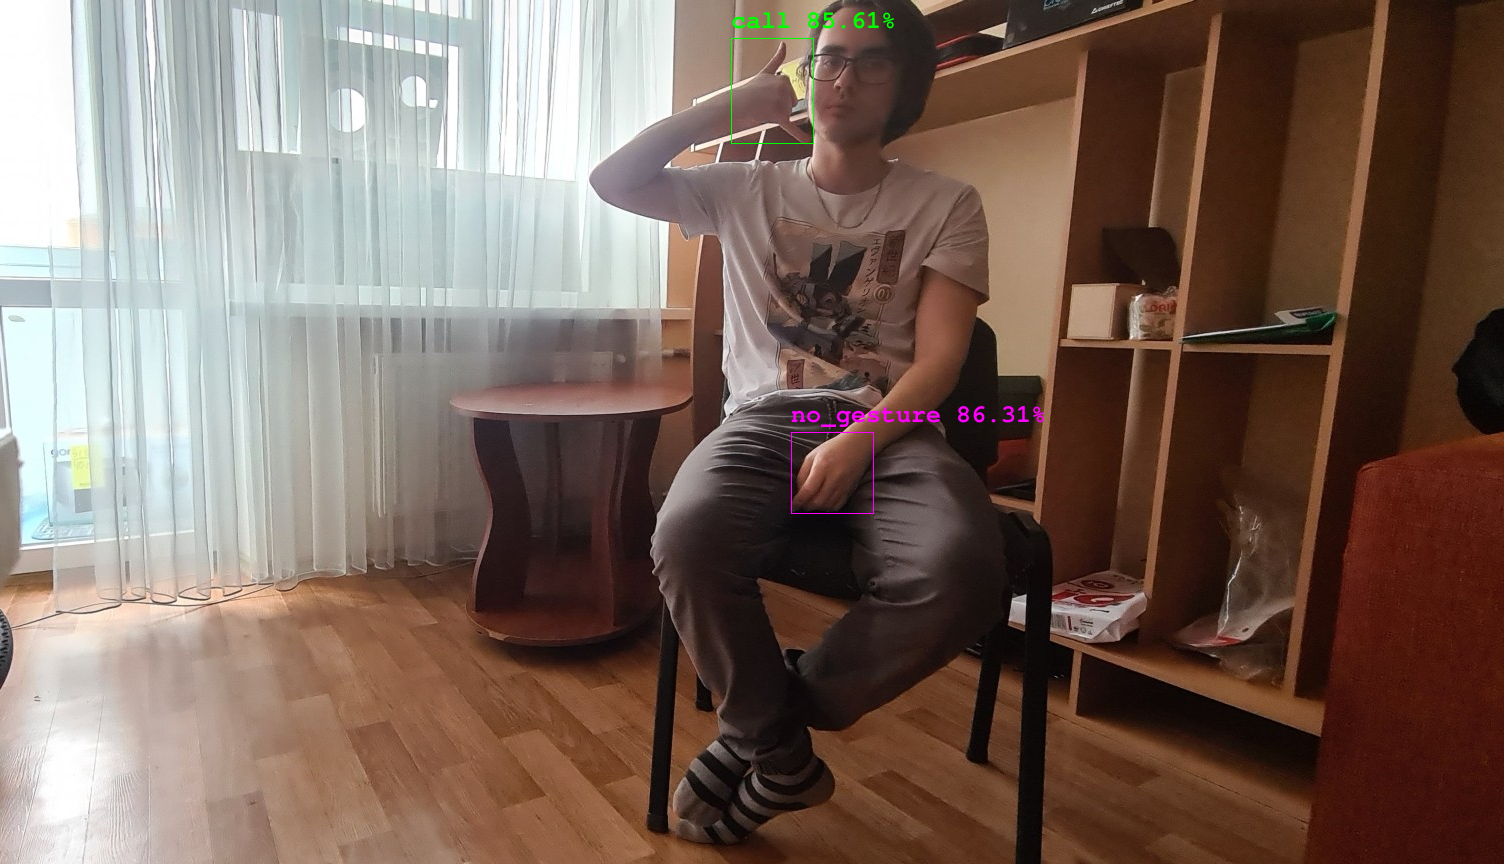

In [191]:
annotated_img = test_img.copy()
draw = ImageDraw.Draw(annotated_img)
fnt_size = 25
for i in proposal_indices:
    x, y, w, h, l, p = proposals[i].values()
    shape = (x, y, x+w, y+h)
    color = colors_255[proposals[i]['label']]
    draw.rectangle(shape, outline=color)
    fnt = PIL.ImageFont.truetype("Pillow/Tests/fonts/FreeMonoBold.ttf", fnt_size)
    draw.multiline_text((x, y-fnt_size-5), f"{labels[l]} {p*100:.2f}%", font=fnt, fill=color)
print(annotated_img.size) 
annotated_img

In [192]:
annotated_img.save('HaGRID_thummnail.png')

**Benchmark OpenVINO IR CPU inference speed**

In [71]:
%%timeit
compiled_model_ir([input_image])[output_layer_ir]

16.1 ms ± 180 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Create JSON color map**

In [72]:
color_map = {'items': list()}
color_map['items'] = [{'label': label, 'color': color} for label, color in zip(labels, colors)]
color_map

{'items': [{'label': 'call', 'color': [0.0, 1.0, 0.0]},
  {'label': 'no_gesture', 'color': [1.0, 0.0, 1.0]},
  {'label': 'dislike', 'color': [0.0, 0.5, 1.0]},
  {'label': 'fist', 'color': [1.0, 0.5, 0.0]},
  {'label': 'four', 'color': [0.5, 0.75, 0.5]},
  {'label': 'like', 'color': [0.32604, 0.02707, 0.66054]},
  {'label': 'mute', 'color': [0.7901, 0.01367, 0.17559]},
  {'label': 'ok', 'color': [0.96825, 0.49913, 0.83728]},
  {'label': 'one', 'color': [0.03309, 0.50177, 0.16568]},
  {'label': 'palm', 'color': [0.99175, 0.98194, 0.25073]},
  {'label': 'peace', 'color': [0.0, 1.0, 1.0]},
  {'label': 'peace_inverted', 'color': [0.0, 1.0, 0.5]},
  {'label': 'rock', 'color': [0.52172, 0.30706, 0.98997]},
  {'label': 'stop', 'color': [0.58974, 0.35646, 0.35403]},
  {'label': 'stop_inverted', 'color': [0.53545, 0.91545, 0.00923]},
  {'label': 'three', 'color': [0.48846, 0.76648, 0.99952]},
  {'label': 'three2', 'color': [0.0, 0.0, 1.0]},
  {'label': 'two_up', 'color': [0.16465, 0.41777, 0.578

In [73]:
dataset_path.name

'hagrid_30k'

**Export color map**

In [ ]:
import json

color_map_file_name = f"{dataset_path.name}-colormap.json"

with open(color_map_file_name, "w") as write_file:
    json.dump(color_map, write_file)
    
color_map_file_name

**Export color maps for C++ command-line demo**

In [ ]:
labels_cpp_file_name = f'{dataset_path.name}-labels-cpp.txt'
colormap_cpp_file_name = f'{dataset_path.name}-colormap-cpp.txt'

with open(labels_cpp_file_name, "w") as write_file:
    write_file.write(str(labels).replace("'", '"').replace("[", '{').replace("]", '}'))

with open(colormap_cpp_file_name, "w") as write_file:
    write_file.write(str(colors).replace("'", '"').replace("[", '{').replace("]", '}'))